# WEEK 3 - FILE 1

# Linear Regression - Single independent variable

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [38]:
df=pd.read_excel("Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [39]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

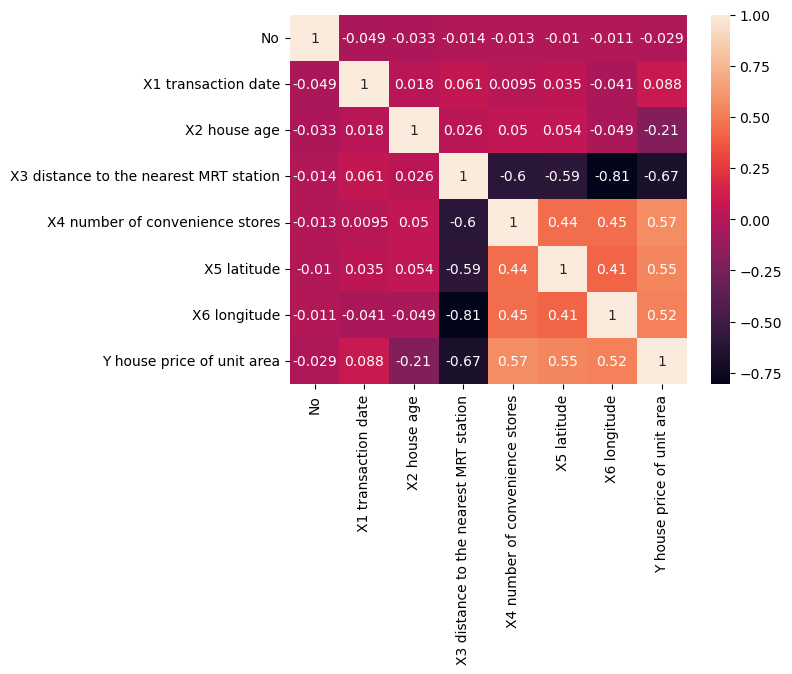

In [40]:
sns.heatmap(df.corr(),annot=True)

### Y house price of unit area, X3 distance to the nearest MRT station have the highest correlation, so we will take those 2 columns

In [41]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [42]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [44]:
df["X3 distance to the nearest MRT station"].isnull().sum()

0

In [45]:
df['Y house price of unit area'].isnull().sum()

0

In [46]:
X = df.iloc[:, [3]]  # Replace [0] with the index of the first column you want
y = df.iloc[:, [7]]  # Replace [1] with the index of the second column you want

# Convert selected columns to arrays
X_array = X.values
Y_array = y.values
X_array

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [47]:
df.fillna(method ='ffill', inplace = True)

In [48]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

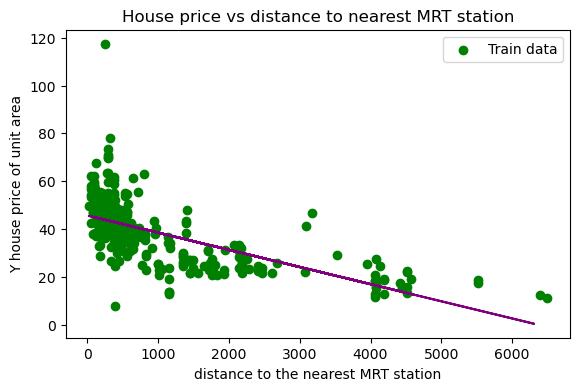

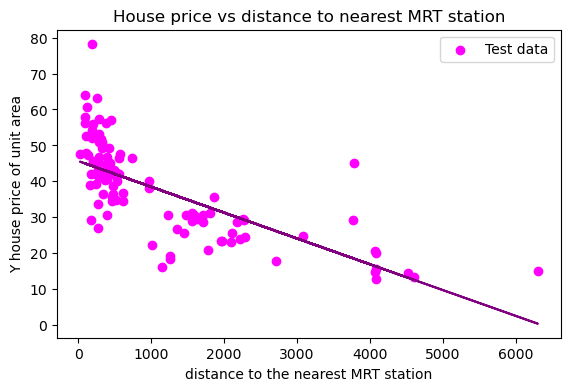

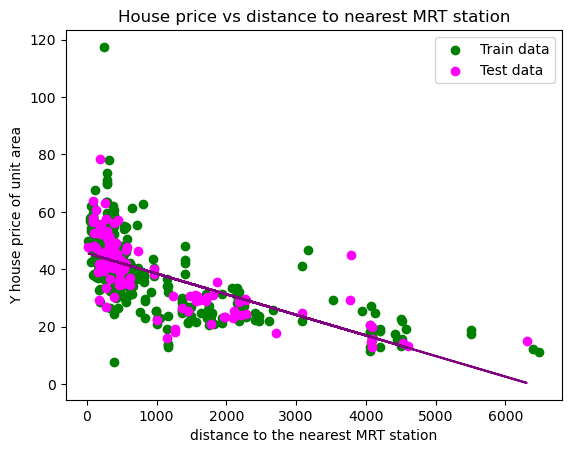

Coeficient:  -0.0071803230090079365
Intercept:  [45.65518589]



Evaluation metrics:

R squared for test data:  0.5268511757213367
mean_squared_error :  81.99587758549795
mean_absolute_error :  6.704194988803758


In [50]:
y_pred = regr.predict(X_test)

plt.figure(figsize=((6.5,4)))
plt.scatter(X_train, y_train, color ='g',label="Train data")
plt.plot(X_test, y_pred,color="purple")
plt.xlabel('distance to the nearest MRT station') 
plt.ylabel('Y house price of unit area')
plt.title("House price vs distance to nearest MRT station")
plt.legend()
plt.show()

plt.figure(figsize=((6.5,4)))
plt.scatter(X_test, y_test, color ='magenta',label="Test data")
plt.plot(X_test, y_pred,color="purple")
plt.xlabel('distance to the nearest MRT station') 
plt.ylabel('Y house price of unit area')
plt.title("House price vs distance to nearest MRT station")
plt.legend()
plt.show()

plt.scatter(X_train, y_train, color ='g',label="Train data")
plt.xlabel('distance to the nearest MRT station') 
plt.ylabel('Y house price of unit area')
plt.title("House price vs distance to nearest MRT station")

plt.scatter(X_test, y_test, color ='magenta',label="Test data")
plt.plot(X_test, y_pred,color="purple")
plt.legend()
plt.show()

print("Coeficient: ",regr.coef_[0][0])
print("Intercept: ",regr.intercept_)
print("\n\n\nEvaluation metrics:\n")
print("R squared for test data: ",regr.score(X_test, y_test))
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 




# Multilinear regression - several independent variables

In [51]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


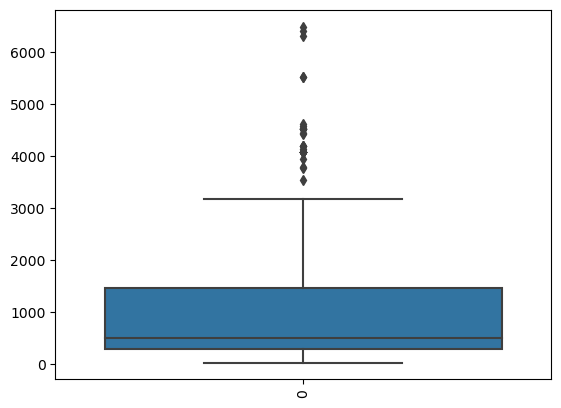

In [54]:
sns.boxplot(data=df['X3 distance to the nearest MRT station'])
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [55]:
def replace_outliers_with_median(column):
    # Calculate the median
    median_value = column.median()

    # Calculate the IQR (Interquartile Range)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    column_outliers_replaced = column.where((column >= lower_bound) & (column <= upper_bound), median_value)

    return column_outliers_replaced

# Replace outliers in 'column_name' with the median
df['X3 distance to the nearest MRT station'] = replace_outliers_with_median(df['X3 distance to the nearest MRT station'])


In [56]:
X=df[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y=df[['Y house price of unit area']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LinearRegression() 
model.fit(X_train,y_train)
print("Intercept: ",model.intercept_,end="\n")
print("\n\nEvaluation metrics:\predictions = model.predict(X_test) 

print("\nCoeficient: ",model.coef_,end="\n\n")
n")
print("R squared: ",model.score(X_test, y_test))
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))





Coeficient:  [[ 4.89013361e+00 -3.01212773e-01 -6.37154585e-03  1.02981854e+00
   3.63543558e+02  1.70835871e+02]]

Intercept:  [-39639.91738549]


Evaluation metrics:

R squared:  0.6795368659149579
mean_squared_error :  42.42172915526599
mean_absolute_error :  5.043077978635917


#### We see that R squared value has incresed and the value of mean_squared_error and mean_absolute error have reduced. Our model's performace has increased